In [ ]:
#Baseline CNN Model - Plant Disease Classification

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(38, activation='softmax')
])

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
DATASET_PATH = r"C:\dataset_FINAL"
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)
val_data = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
train_generator = train_data.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    seed=SEED
)

val_generator = val_data.flow_from_directory(
    DATASET_PATH,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    seed=SEED
)

Found 112488 images belonging to 38 classes.
Found 28102 images belonging to 38 classes.


In [13]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4095s 1s/step - accuracy: 0.4969 - loss: 1.7107 - val_accuracy: 0.7287 - val_loss: 0.8627
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2208s 628ms/step - accuracy: 0.7164 - loss: 0.9073 - val_accuracy: 0.8558 - val_loss: 0.4507
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2215s 630ms/step - accuracy: 0.7860 - loss: 0.6748 - val_accuracy: 0.9042 - val_loss: 0.3045
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2402s 683ms/step - accuracy: 0.8187 - loss: 0.5765 - val_accuracy: 0.9029 - val_loss: 0.3057
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2520s 717ms/step - accuracy: 0.8390 - loss: 0.5043 - val_accuracy: 0.9302 - val_loss: 0.2291
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2224s 633ms/step - accuracy: 0.8537 - loss: 0.4632 - val_accuracy: 0.9461 - val_loss: 0.1739
Epoch 7/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2690s 765ms/step - accuracy: 0.8658 - loss: 0.4289 - val_accuracy: 0.9452 - val_loss: 0.1713
Epoch 8/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2378s 676ms/step

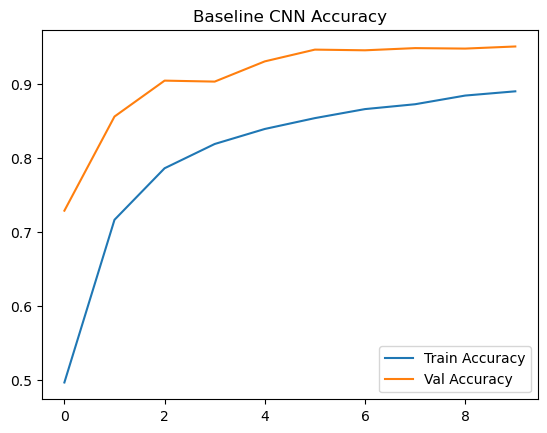

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Baseline CNN Accuracy")
plt.show()

## Baseline Model Observations

- Baseline CNN achieves moderate accuracy
- Signs of overfitting observed due to limited capacity
- Training from scratch requires large datasets and compute
- Highlights need for transfer learning

In [16]:
model.save("../models/baseline_cnn.h5")

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [10]:
base_model= MobileNetV2(
    input_shape=(224,224,3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable=False

In [13]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128, activation='relu')(x)
x=Dropout(0.5)(x)
outputs= Dense(38, activation='softmax')(x)

model=Model(inputs=base_model.input, outputs=outputs)

In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history_t = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2382s 675ms/step - accuracy: 0.6038 - loss: 1.4174 - val_accuracy: 0.8768 - val_loss: 0.4684
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2113s 601ms/step - accuracy: 0.8094 - loss: 0.6275 - val_accuracy: 0.9062 - val_loss: 0.3266
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2672s 760ms/step - accuracy: 0.8497 - loss: 0.4848 - val_accuracy: 0.9206 - val_loss: 0.2650
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2585s 735ms/step - accuracy: 0.8717 - loss: 0.4075 - val_accuracy: 0.9315 - val_loss: 0.2279
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2283s 649ms/step - accuracy: 0.8847 - loss: 0.3677 - val_accuracy: 0.9342 - val_loss: 0.2109
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4188s 1s/step - accuracy: 0.8927 - loss: 0.3396 - val_accuracy: 0.9398 - val_loss: 0.1943
Epoch 7/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2426s 690ms/step - accuracy: 0.8994 - loss: 0.3159 - val_accuracy: 0.9410 - val_loss: 0.1856
Epoch 8/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2215s 630ms/step

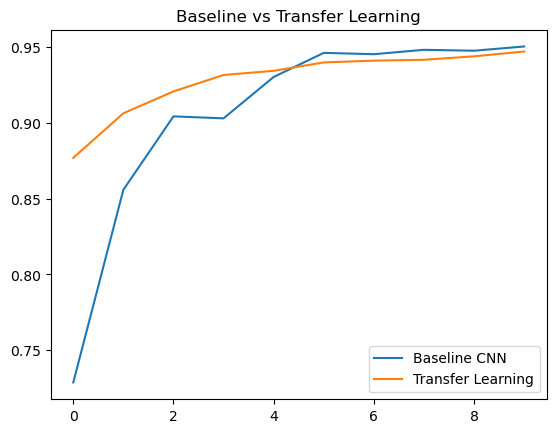

In [9]:
import matplotlib.pyplot as plt
old_val_acc = [0.7287, 0.8558, 0.9042, 0.9029, 0.9302, 0.9461, 0.9452, 0.9481, 0.9475, 0.9503]
plt.plot(old_val_acc, label='Baseline CNN')
plt.plot(history_t.history['val_accuracy'], label='Transfer Learning')
plt.legend()
plt.title("Baseline vs Transfer Learning")
plt.show()

Transfer learning significantly outperforms training from scratch due to reuse of pretrained features.

In [10]:
model.save("../models/mobilenet_transfer.h5")

## Transfer Learning Observations

- MobileNetV2 significantly improves accuracy
- Faster convergence compared to baseline CNN
- Better generalization on validation set
- Suitable for mobile and edge deployment

In [17]:
#Unfreeze the top layers of the base model
base_model.trainable = True

#Freeze bottom layers, unfreeze top N layers
fine_tune= int(len(base_model.layers) * 0.75)

for i in base_model.layers[:fine_tune]:
    i.trainable=False

In [14]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
history_ft = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2566s 726ms/step - accuracy: 0.5835 - loss: 1.5725 - val_accuracy: 0.9129 - val_loss: 0.3152
Epoch 2/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4161s 1s/step - accuracy: 0.8744 - loss: 0.4478 - val_accuracy: 0.9575 - val_loss: 0.1401
Epoch 3/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3246s 923ms/step - accuracy: 0.9233 - loss: 0.2704 - val_accuracy: 0.9683 - val_loss: 0.1006
Epoch 4/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2491s 709ms/step - accuracy: 0.9452 - loss: 0.1921 - val_accuracy: 0.9742 - val_loss: 0.0791
Epoch 5/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2377s 676ms/step - accuracy: 0.9564 - loss: 0.1508 - val_accuracy: 0.9765 - val_loss: 0.0753
Epoch 6/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3197s 909ms/step - accuracy: 0.9652 - loss: 0.1200 - val_accuracy: 0.9812 - val_loss: 0.0596
Epoch 7/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 3802s 1s/step - accuracy: 0.9708 - loss: 0.0994 - val_accuracy: 0.9824 - val_loss: 0.0554
Epoch 8/10
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2318s 659ms/step - 

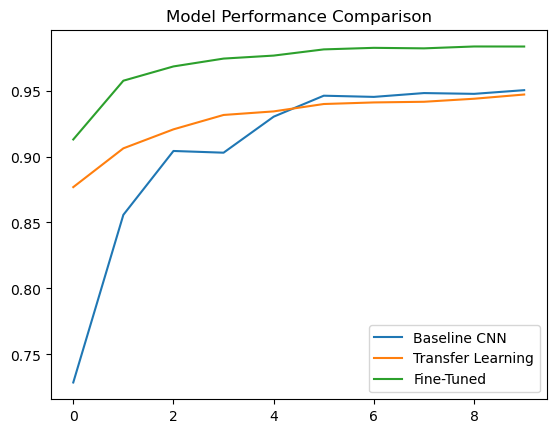

In [17]:
import matplotlib.pyplot as plt
old_val_acc = [0.7287, 0.8558, 0.9042, 0.9029, 0.9302, 0.9461, 0.9452, 0.9481, 0.9475, 0.9503]
old_val_acc2 = [0.8768, 0.9062, 0.9206, 0.9315, 0.9342, 0.9398, 0.9410, 0.9415, 0.9438, 0.9470]
plt.plot(old_val_acc, label='Baseline CNN')
plt.plot(old_val_acc2, label='Transfer Learning')
plt.plot(history_ft.history['val_accuracy'], label='Fine-Tuned')
plt.legend()
plt.title("Model Performance Comparison")
plt.show()

In [18]:
model.save("../models/mobilenet_finetuned.h5")

## Fine-Tuning Insights
- Fine-tuning improves feature specialization for plant diseases
- Low learning rate prevents overfitting and feature destruction
- Best validation accuracy achieved after fine-tuning
- Final model balances accuracy and efficiency

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [11]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
val_generator.reset()

In [12]:
y_pred_p = model.predict(val_generator)
y_pred = np.argmax(y_pred_p, axis=1)
y_true = val_generator.classes

879/879 ━━━━━━━━━━━━━━━━━━━━ 249s 283ms/step


In [9]:
class_n = list(val_generator.class_indices.keys())

In [71]:
rep= classification_report(
    y_true,
    y_pred,
    target_names=class_n
)
print(rep)

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       806
                                 Apple___Black_rot       0.00      0.00      0.00       794
                          Apple___Cedar_apple_rust       0.00      0.00      0.00       704
                                   Apple___healthy       0.02      0.03      0.02       803
                               Blueberry___healthy       0.01      0.00      0.00       726
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       673
                 Cherry_(including_sour)___healthy       0.02      0.00      0.00       730
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       656
                       Corn_(maize)___Common_rust_       0.00      0.00      0.00       762
               Corn_(maize)___Northern_Leaf_Blight       0.03      0.20      0.

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


Accuracy alone hides class-wise performance; F1-score reveals model reliability across diseases.

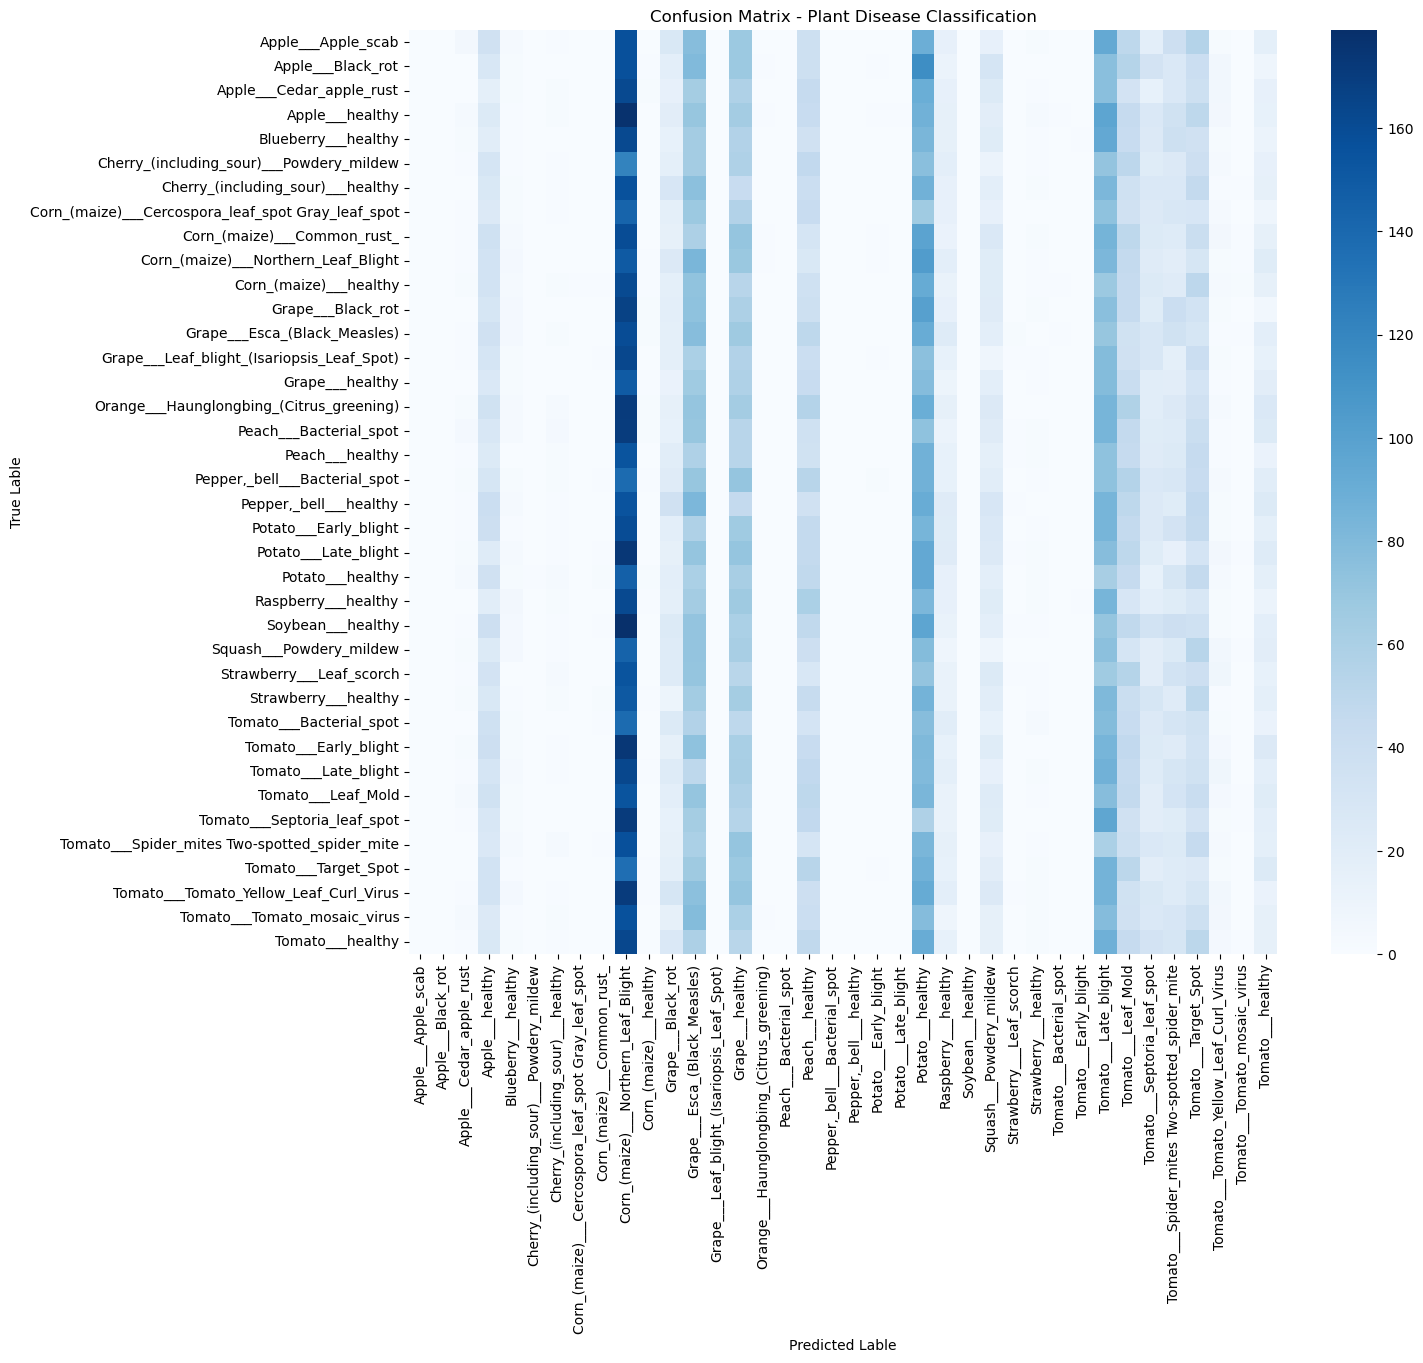

In [72]:
cm=confusion_matrix(y_true, y_pred)

plt.figure(figsize=(14,12))
sns.heatmap(
    cm,
    xticklabels=class_n,
    yticklabels=class_n,
    cmap='Blues',
    fmt='d'
)
plt.xlabel("Predicted Lable")
plt.ylabel("True Lable")
plt.title("Confusion Matrix - Plant Disease Classification")
#plt.savefig("../results/confusion_matrix.png", bbox_inches = "tight" )
plt.show()

## Error Analysis

- Certain disease classes are confused due to similar visual symptoms
- Classes with fewer samples show lower recall
- Model perfroms best on visually distinct diseases

In [75]:
class_cor= {}
class_total= {}

for i in range(len(y_true)):
    l= class_n[y_true[i]]
    class_total[l]= class_total.get(l,0)+1
    if y_true[i]==y_pred[i]:
        class_cor[l]= class_cor.get(l,0)+1

class_accuracy={
    cls: class_cor.get(cls, 0)/class_total[cls]
    for cls in class_total
}

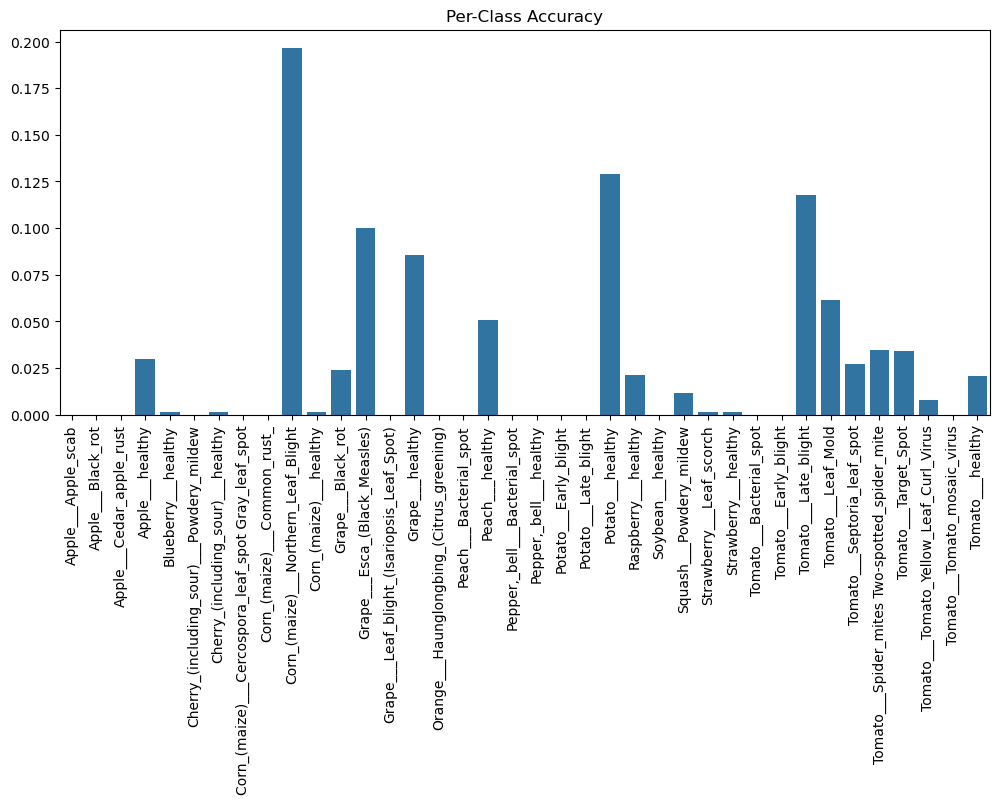

In [76]:
plt.figure(figsize=(12,5))
sns.barplot(x=list(class_accuracy.keys()), y=list(class_accuracy.values()))
plt.xticks(rotation=90)
plt.title("Per-Class Accuracy")
plt.show()

In [23]:
with open("../results/classification_report.txt", "w") as f:
    f.write(rep)

## Evaluation Summary

- Model achieves strong overall accuracy
- Performance varies across disease classes
- Class imbalance impacts recall for rare diseases
- Confusion matrix highlights visually similar disease patterns

In [13]:
misclassified_indices= np.where(y_true!=y_pred)[0]
len(misclassified_indices)

27384

Total misclassified samples: 27384

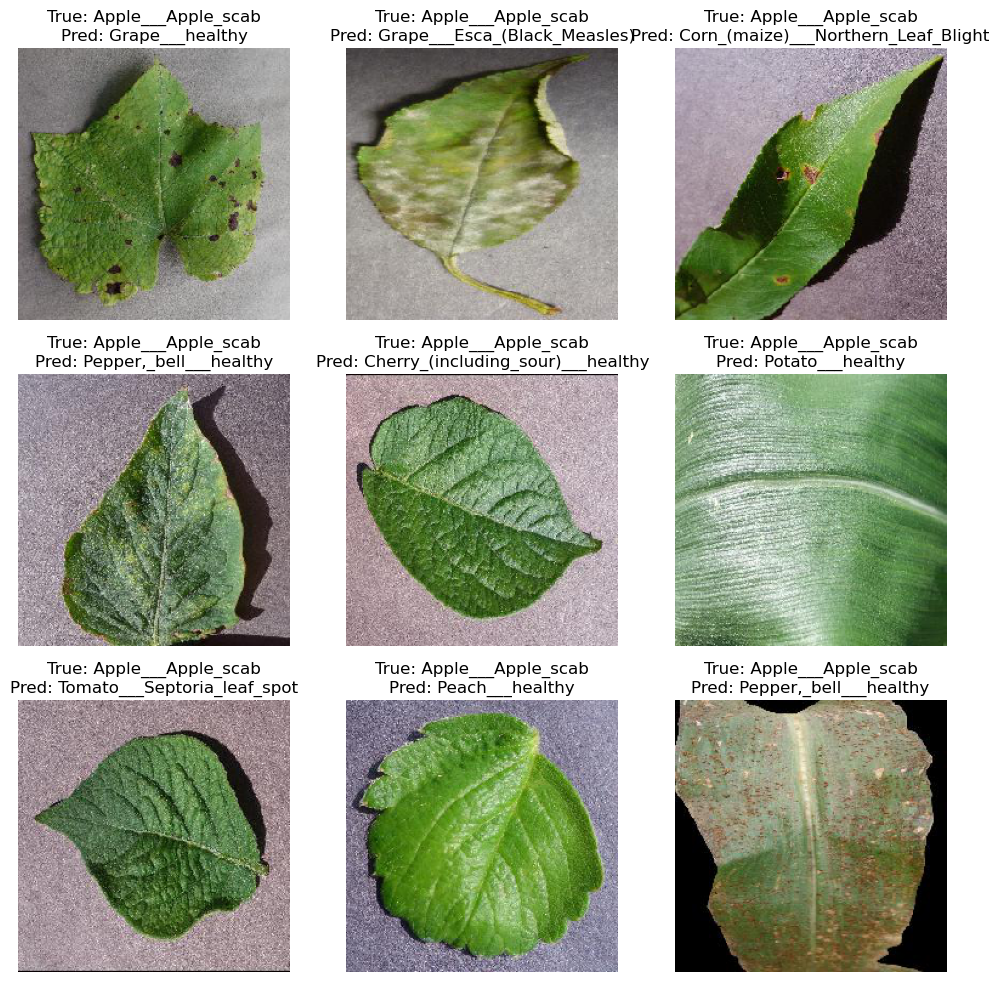

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

for i,idx in enumerate(misclassified_indices[:9]):
    im, l= val_generator[idx]
    true_l=class_n[y_true[idx]]
    pred_l=class_n[y_pred[idx]]

    plt.subplot(3,3,i+1)
    plt.imshow(im[0])
    plt.title(f"True: {true_l}\nPred: {pred_l}")
    plt.axis('off')

plt.savefig("../results/misclassified_samples.png", bbox_inches="tight")
plt.show()

## Types of Errors Observed

1. Visually similar diseases (e.g., early vs late stage)
2. Low-resolution or blurry images
3. Background interference (soil, hand, shadows)
4. Underrepresented disease classes

In [18]:
import pandas as pd

err_df= pd.DataFrame({
    "True": [class_n[i] for i in y_true[misclassified_indices]],
    "Predicted": [class_n[i] for i in y_pred[misclassified_indices]]
})

err_df.value_counts().head(10)

True                                      Predicted       
Orange___Haunglongbing_(Citrus_greening)  Potato___healthy    185
Apple___Black_rot                         Potato___healthy    184
Apple___healthy                           Potato___healthy    177
Potato___Late_blight                      Potato___healthy    176
Tomato___Early_blight                     Potato___healthy    173
Potato___Early_blight                     Potato___healthy    167
Apple___Apple_scab                        Potato___healthy    166
Pepper,_bell___healthy                    Potato___healthy    164
Pepper,_bell___Bacterial_spot             Potato___healthy    164
Tomato___Target_Spot                      Potato___healthy    163
Name: count, dtype: int64

Most confusion occurs between visually similar disease classes within the same crop.

## Root Cause Analysis

- CNN relies on texture and color, which overlaps across diseases
- Datset images are taken under controlled conditions
- Model struggles with subtle disease progression stages
- Limited context (only leaf images, no metadeta)

## Potential Improvements

- Introduce disease severity classification
- Add attention mechanisms or Grad-CAM guidance
- Collect field-condition images
- Use class-weighted loss to handle imbalance
- Multi-task learning: crop + disease classification

## Day 8 Summary 

- Performed detailed error analysis
- Identified visually confusing disease classes
- Understood limitations of dataset and model
- Proposed realistic and scalable improvements

In [1]:
from tensorflow.keras.applications import EfficientNetB0 

In [2]:
    eff_base= EfficientNetB0(
        input_shape= (224,224,3),
        include_top=False,
        weights='imagenet'
    )

    eff_base.trainable=False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
x=eff_base.output
x=GlobalAveragePooling2D()(x)
x=Dense(128, activation="relu")(x)
x=Dropout(0.5)(x)
outputs= Dense(38, activation='softmax')(x)

eff_model= Model(
    inputs=eff_base.input,
    outputs=outputs
)

In [7]:
eff_model.compile(
    optimizer= Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
his_eff= eff_model.fit(
    train_generator,
    epochs=8,
    validation_data=val_generator
)

Epoch 1/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2792s 791ms/step - accuracy: 0.0276 - loss: 3.6381 - val_accuracy: 0.0287 - val_loss: 3.6369
Epoch 2/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2785s 792ms/step - accuracy: 0.0288 - loss: 3.6367 - val_accuracy: 0.0283 - val_loss: 3.6371
Epoch 3/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2457s 699ms/step - accuracy: 0.0286 - loss: 3.6364 - val_accuracy: 0.0287 - val_loss: 3.6362
Epoch 4/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2494s 709ms/step - accuracy: 0.0283 - loss: 3.6363 - val_accuracy: 0.0287 - val_loss: 3.6361
Epoch 5/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4600s 1s/step - accuracy: 0.0286 - loss: 3.6362 - val_accuracy: 0.0288 - val_loss: 3.6361
Epoch 6/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2408s 685ms/step - accuracy: 0.0285 - loss: 3.6361 - val_accuracy: 0.0288 - val_loss: 3.6360
Epoch 7/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 4682s 1s/step - accuracy: 0.0282 - loss: 3.6361 - val_accuracy: 0.0288 - val_loss: 3.6360
Epoch 8/8
3516/3516 ━━━━━━━━━━━━━━━━━━━━ 2515s 715ms/step - accuracy

In [9]:
eff_model.save("../models/efficientnet.h5")

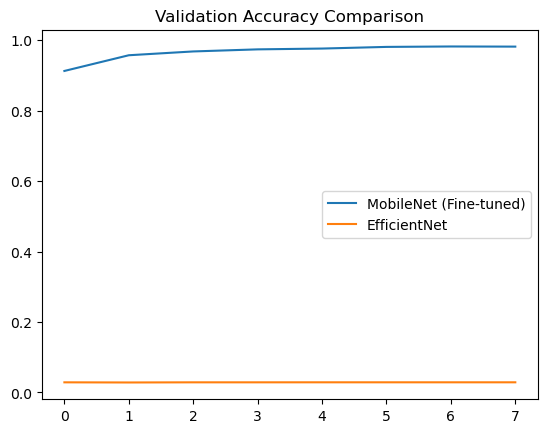

In [20]:
fine_tuned = [0.9129, 0.9575, 0.9683, 0.9742, 0.9765, 0.9812, 0.9824, 0.982]
import matplotlib.pyplot as plt
plt.plot(fine_tuned, label='MobileNet (Fine-tuned)')
plt.plot(his_eff.history['val_accuracy'], label='EfficientNet')
plt.legend()
plt.title('Validation Accuracy Comparison')
plt.savefig("../results/model_comparison.png", bbox_inches="tight")
plt.show()

In [12]:
import os

mobilenet_s= os.path.getsize("../models/mobilenet_finetuned.h5")/(1024*1024)
efficient_s = os.path.getsize("../models/efficientnet.h5")/(1024*1024)

mobilenet_s, efficient_s

(23.925514221191406, 18.080650329589844)

EfficientNet has a less model size at a cost of low accuracy.

In [19]:
import time

sam_batch, c = next(val_generator)

start = time.time()
c=model.predict(sam_batch)
mobilenet_t= time.time()- start

start = time.time()
c= eff_model.predict(sam_batch)
efficient_t = time.time()-start

mobilenet_t, efficient_t

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(1.1478793621063232, 1.8200628757476807)

## Model Comparison Summary

| Model | Val Accuracy | Size (MB) | Inference Time |
|-----|-------------|-----------|----------------|
| Baseline CNN | Low | Small | Slow |
| MobileNetV2 | High | Very Small | Fast |
| EfficientNetB0 | Very Low | Small | Slower |

**Conclusion:** MobileNet offers the best trade-off for mobile and edge deployment.


## Explainable AI (Grad-CAM)

Grad-CAM highlights the regions of a image that contribute most to the model's prediction, helping verify whether the model focuses on actual disease symtoms rather than background noise.

In [8]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [15]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,426,854 (9.26 MB)

 Trainable params: 168,870 (659.65 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [16]:
last_convo= "Conv_1"

In [23]:
def make_gradcam_heatmap(im_arr, model, last_convo, pred_index=None):
    grad_model=tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_convo).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_out, pred= grad_model(im_arr)
        if pred_index is None:
            pred_index= tf.argmax(pred[0])
        class_c= pred[:,pred_index]

    grads= tape.gradient(class_c, conv_out)
    pooled_g= tf.reduce_mean(grads, axis=(0,1,2))

    conv_out= conv_out[0]
    hm= conv_out @ pooled_g[..., tf.newaxis] 
    hm= tf.squeeze(hm)

    hm= tf.maximum(hm, 0)/tf.math.reduce_max(hm)
    return hm.numpy()

In [21]:
import os
img_path= os.path.join(
    DATASET_PATH,
    class_n[0],
    os.listdir(os.path.join(DATASET_PATH, class_n[0]))[0]
)

img= tf.keras.preprocessing.image.load_img(img_path, target_size=(224,224))
img_arr= tf.keras.preprocessing.image.img_to_array(img)
img_arr= np.expand_dims(img_arr, axis=0)/255.0

In [24]:
hm= make_gradcam_heatmap(
    img_arr,
    model,
    last_convo
)

In [25]:
img= cv2.imread(img_path)
img= cv2.resize(img, (224,224))

hm_resized= cv2.resize(hm, (224,224))
hm_col= cv2.applyColorMap(
    np.uint8(225*hm_resized),
    cv2.COLORMAP_JET
)

si_img= cv2.addWeighted(img, 0.6, hm_col, 0.4, 0)

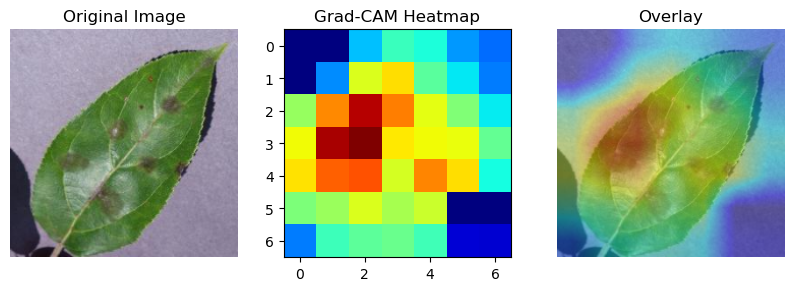

In [26]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Grad-CAM Heatmap")
plt.imshow(hm, cmap="jet")

plt.subplot(1,3,3)
plt.title("Overlay")
plt.imshow(cv2.cvtColor(si_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

In [30]:
os.makedirs("../results/gradcam_samples", exist_ok=True)
cv2.imwrite("../results/gradcam_samples/sample1.png", si_img)

True

## Grad-CAM Observations

- Model focuses on disease regions of the leaf
- Heatmap aligns with visible spots and discoloration
- Minimal attention to background
- Confirms model learns biologically meaningful features

Explainability builds trust in AI systems and is critical for real-world agricultural deloyment where incorrect predictions can impact crop yield. 

## Mobile Deployment with Tensorflow Lite

Tensorflow Lite enables deplpoyment of deep learning models on mobile and edge devices by reducing model size and improving inference speed without significant accuracy loss.

In [1]:
import tensorflow as tf

model= tf.keras.models.load_model("../models/mobilenet_finetuned.h5")

c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
con= tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model= con.convert()

INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpck31o7nj\assets


INFO:tensorflow:Assets written to: C:\Users\DELL\AppData\Local\Temp\tmpck31o7nj\assets


Saved artifact at 'C:\Users\DELL\AppData\Local\Temp\tmpck31o7nj'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 38), dtype=tf.float32, name=None)
Captures:
  2749583585360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583585936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583585168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583584976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583586128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583586704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583585552: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583586512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583585744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2749583587664: TensorSpec(shape=(), dtype=tf.resource, name=None)
  274958

In [3]:
with open("../models/plant_disease.tflite","wb") as f:
    f.write(tflite_model)

In [4]:
import os

keras_size= os.path.getsize("../models/mobilenet_finetuned.h5")/(1024*1024)
tflite_size= os.path.getsize("../models/plant_disease.tflite")/(1024*1024)

keras_size, tflite_size

(23.925514221191406, 9.092803955078125)

Tensorflow Lite reduces model size significantly, enabling deployment on low-resource devices.

In [5]:
inter= tf.lite.Interpreter(
    model_path= "../models/plant_disease.tflite"
)
inter.allocate_tensors()

c:\Users\DELL\anaconda3\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [6]:
input_details= inter.get_input_details()
output_details= inter.get_output_details()

input_details, output_details

([{'name': 'serving_default_input_layer:0',
   'index': 0,
   'shape': array([  1, 224, 224,   3], dtype=int32),
   'shape_signature': array([ -1, 224, 224,   3], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}],
 [{'name': 'StatefulPartitionedCall_1:0',
   'index': 175,
   'shape': array([ 1, 38], dtype=int32),
   'shape_signature': array([-1, 38], dtype=int32),
   'dtype': numpy.float32,
   'quantization': (0.0, 0),
   'quantization_parameters': {'scales': array([], dtype=float32),
    'zero_points': array([], dtype=int32),
    'quantized_dimension': 0},
   'sparsity_parameters': {}}])

In [10]:
import numpy as np

sam_img, s= next(val_generator)
sam_img= sam_img[0:1].astype(np.float32)

inter.set_tensor(input_details[0]['index'], sam_img)
inter.invoke()
pred= inter.get_tensor(output_details[0]['index'])

pred_class= class_n[np.argmax(pred)]
pred_class

'Peach___Bacterial_spot'

## Deployment Readiness

- Model converted to Tensorflow Lite
- Reduced size suitable for smartphones
- Fast inference on CPU
- Ready for integration with Android or IoT systems